# RETO


Os animamos a que realicéis este ejercicio inspirado en el proyecto indicado por Aemet. En nuestro caso emplearemos como fuente de datos un repositorio abierto, el de la universidad de Irvine: 
Repositorio: https://archive.ics.uci.edu/ml/datasets/Forest+Fires


Deberemos analizar y transformar los datos buscando un buen predictor para la variable de área afectada. Dado que se trata de una serie con gran cantidad de ceros (por suerte) nos recomiendan emplear una transformación logarítmica de los datos.
Transformación del logaritmo: https://www.cuemath.com/algebra/log-to-exponential-form/



Estudio de AEMET

[AEMET Estadística del índice meteorológico de riesgo de incendio](AEMET.pdf)	

## DATA

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.



In [164]:
!pip install ucimlrepo
!pip install matplotlib



[notice] A new release of pip available: 22.3 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 
  


In [167]:
# metadata 
print(forest_fires.metadata) 


{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'title': 'A data mining approach to predict forest fires using meteorological data', 'authors': 'P. Cortez, A

In [168]:
# variable information 
print(forest_fires.variables) 


     name     role         type demographic  \
0       X  Feature      Integer        None   
1       Y  Feature      Integer        None   
2   month  Feature  Categorical        None   
3     day  Feature  Categorical        None   
4    FFMC  Feature   Continuous        None   
5     DMC  Feature      Integer        None   
6      DC  Feature   Continuous        None   
7     ISI  Feature   Continuous        None   
8    temp  Feature   Continuous        None   
9      RH  Feature      Integer        None   
10   wind  Feature   Continuous        None   
11   rain  Feature      Integer        None   
12   area   Target      Integer        None   

                                          description            units  \
0   x-axis spatial coordinate within the Montesinh...             None   
1   y-axis spatial coordinate within the Montesinh...             None   
2                  month of the year: 'jan' to 'dec'              None   
3                     day of the week: 'mon' 

In [169]:
forest_fires.data.features.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0


In [170]:
forest_fires.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB


In [171]:
forest_fires.data.features.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [172]:
forest_fires.data.targets.head(10)

,area
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [173]:
forest_fires.data.targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    517 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


In [174]:
forest_fires.data.targets.describe()

,area
count,517.000000
mean,12.847292
std,63.655818
min,0.000000
25%,0.000000
50%,0.520000
75%,6.570000
max,1090.840000


In [175]:
df = pd.DataFrame(data=X, columns=forest_fires.feature_names)
df['target'] = y

In [176]:
print("Data Types:", df.dtypes)

Data Types: X           int64
Y           int64
month      object
day        object
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
target    float64
dtype: object


In [177]:
numeric_df = df.select_dtypes(include=['number'])


In [178]:
print("Correlation:", numeric_df.corr(method='pearson'))

Correlation:                X         Y      FFMC       DMC        DC       ISI      temp  \
X       1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y       0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC   -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC    -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC     -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI     0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp   -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH      0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind    0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain    0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
target  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

              RH      wind

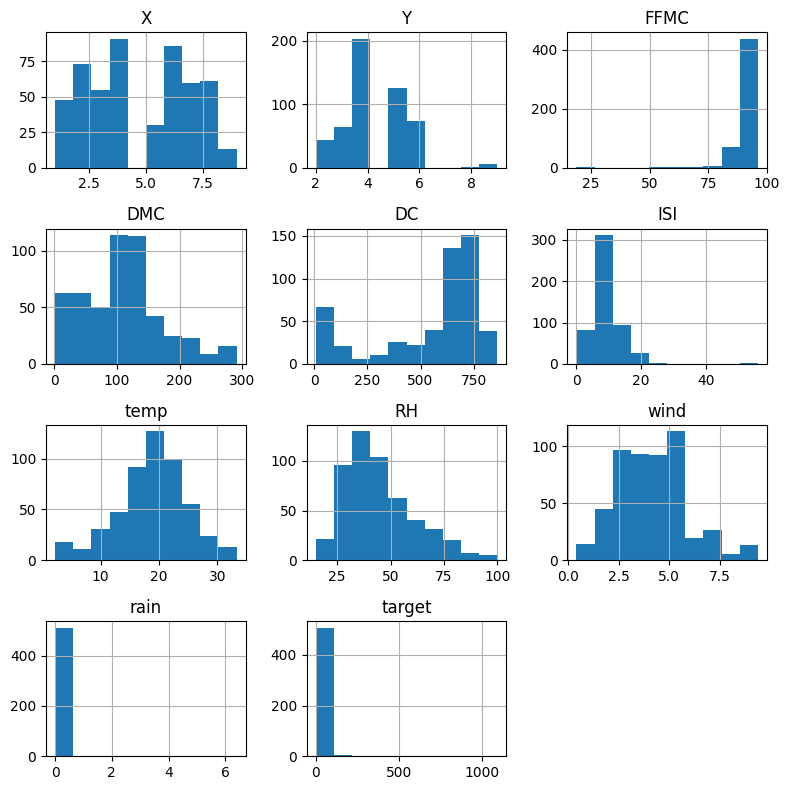

In [179]:
df.hist( figsize=(8, 8))
plt.tight_layout()
plt.show()

In [180]:
print("Correlation:", numeric_df.corr(method='pearson'))

Correlation:                X         Y      FFMC       DMC        DC       ISI      temp  \
X       1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y       0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC   -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC    -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC     -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI     0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp   -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH      0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind    0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain    0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
target  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

              RH      wind

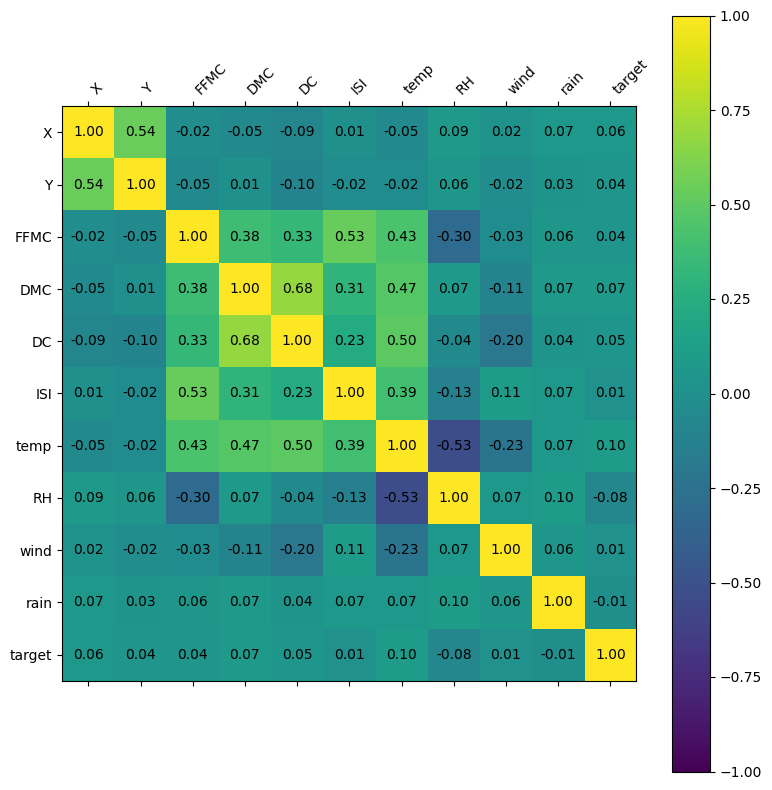

In [181]:
fig, ax = plt.subplots(figsize=(8, 8))

corr_matrix = numeric_df.corr(method='pearson')

cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = np.arange(len(numeric_df.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numeric_df.columns, rotation=45, ha='left')
ax.set_yticklabels(numeric_df.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.tight_layout()

plt.show()

In [182]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun", 
               "jul", "aug", "sep", "oct", "nov", "dec"]

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

month_counts = df['month'].value_counts().sort_index()
month_counts

month
jan      2
feb     20
mar     54
apr      9
may      2
jun     17
jul     32
aug    184
sep    172
oct     15
nov      1
dec      9
Name: count, dtype: int64

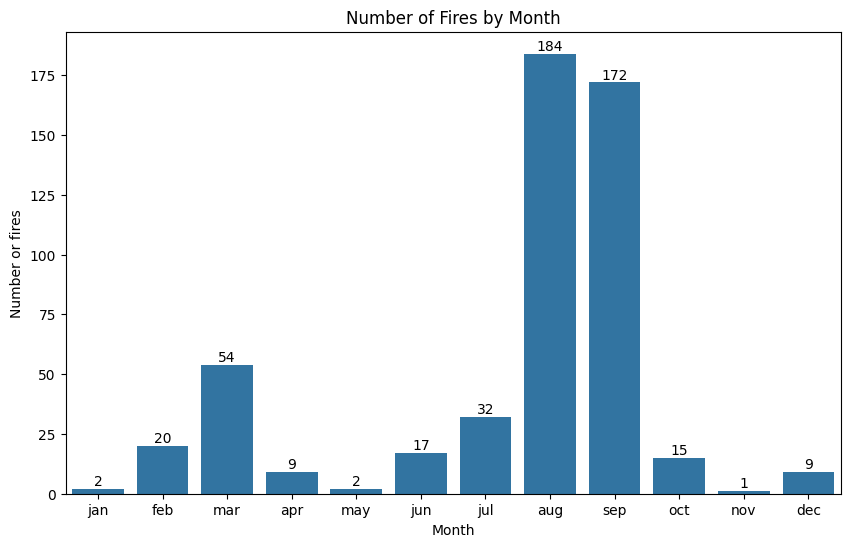

In [183]:
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, order=month_order)
plt.xlabel('Month')
plt.ylabel('Number or fires')
plt.title('Number of Fires by Month')

for i, v in enumerate(month_counts.values):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

C:\Users\Diego Gerwig\AppData\Local\Temp\ipykernel_246200\1044698909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_sum = df.groupby('month')['target'].sum().reindex(month_order, fill_value=0)


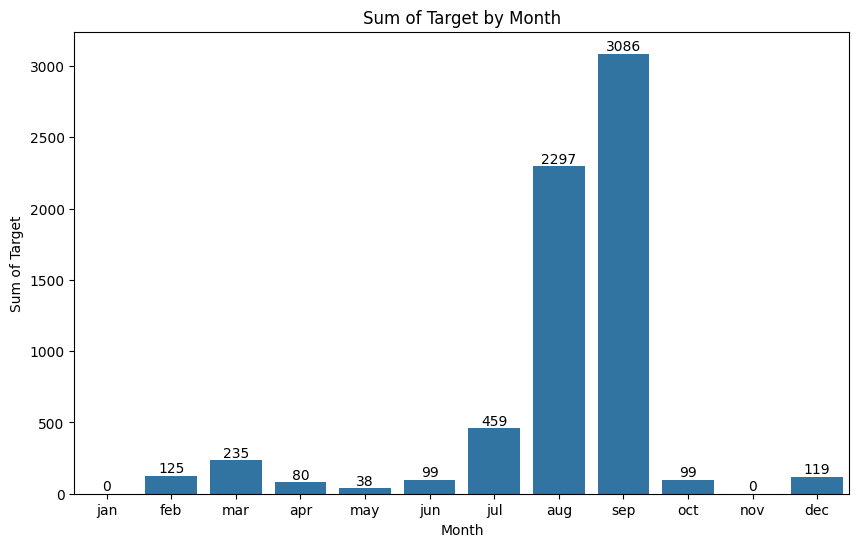

In [184]:
target_sum = df.groupby('month')['target'].sum().reindex(month_order, fill_value=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_sum.index, y=target_sum.values, order=month_order)
plt.xlabel('Month')
plt.ylabel('Sum of Target')
plt.title('Sum of Target by Month')

for i, v in enumerate(target_sum.values):
    plt.text(i, v + 0.2, f'{int(v)}', ha='center', va='bottom', fontsize=10)

plt.show()

C:\Users\Diego Gerwig\AppData\Local\Temp\ipykernel_246200\390350880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_mean = df.groupby('month')['target'].mean().reindex(month_order, fill_value=0)


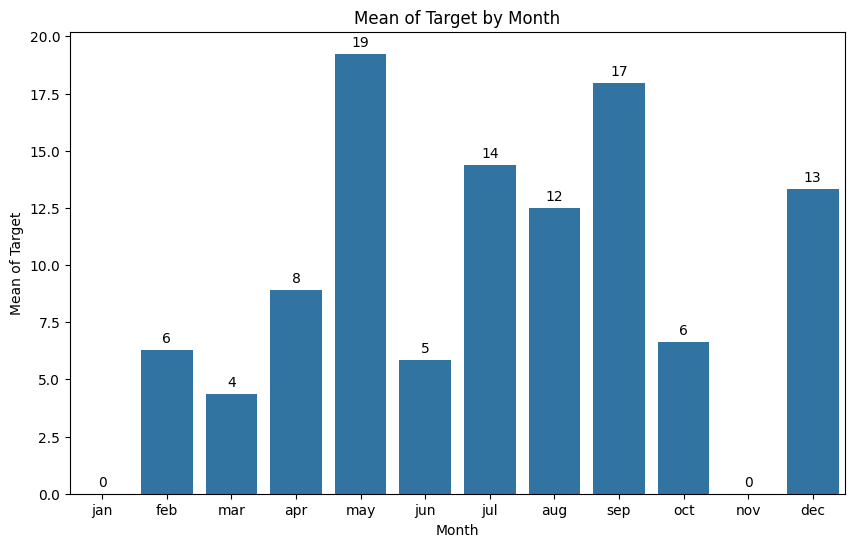

In [185]:
target_mean = df.groupby('month')['target'].mean().reindex(month_order, fill_value=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_mean.index, y=target_mean.values, order=month_order)
plt.xlabel('Month')
plt.ylabel('Mean of Target')
plt.title('Mean of Target by Month')

for i, v in enumerate(target_mean.values):
    plt.text(i, v + 0.2, f'{int(v)}', ha='center', va='bottom', fontsize=10)

plt.show()

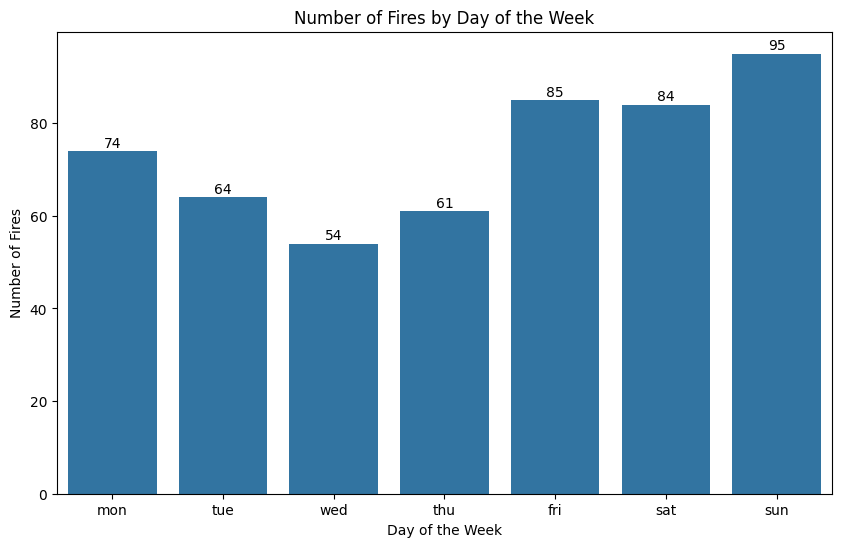

In [186]:
day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

day_counts = df['day'].value_counts().reindex(day_order, fill_value=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, order=day_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fires')
plt.title('Number of Fires by Day of the Week')

# Añadir los valores numéricos en cada columna
for i, v in enumerate(day_counts.values):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

## TRAIN

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Linear Regression

In [188]:
df = pd.DataFrame(data=features, columns=forest_fires.feature_names)  
df = pd.get_dummies(df, columns=['day', 'month'], drop_first=True)
df['area'] = targets
X = df.drop(columns=['area'])  # Features
y = df['area']  # Target variable

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
print('Train shape')
print(X_train.shape)
print(y_train.shape)

print('Test shape')
print(X_test.shape)
print(y_test.shape)

Train shape
(413, 27)
(413,)
Test shape
(104, 27)
(104,)


In [191]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [192]:
print(f"Train SCORE: {lr.score(X_train, y_train)}")
print(f"Test  SCORE: {lr.score(X_test, y_test)}")

Train SCORE: 0.049797540552704356
Test  SCORE: 0.014768502010551687


In [193]:
y_train_pred = lr.predict(X_train)  # Predictions on training data
y_test_pred = lr.predict(X_test)  # Predictions on test data

train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

train_rmse = np.sqrt(train_mse)  
test_rmse = np.sqrt(test_mse)  

train_mae = mean_absolute_error(y_train, y_train_pred)  
test_mae = mean_absolute_error(y_test, y_test_pred)  

train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")  
print(f"Test  MSE: {test_mse}")  
print(f"\nTrain RMSE: {train_rmse}")  
print(f"Test  RMSE: {test_rmse}")  
print(f"\nTrain MAE: {train_mae}")  
print(f"Test  MAE: {test_mae}")  
print(f"\nTrain R2 Score: {train_r2}") 
print(f"Test  R2 Score: {test_r2}")  

Train MSE: 1976.09357861925
Test  MSE: 11613.674532130444

Train RMSE: 44.45327410460617
Test  RMSE: 107.76675986653048

Train MAE: 16.56912632766214
Test  MAE: 24.52669223665317

Train R2 Score: 0.049797540552704356
Test  R2 Score: 0.014768502010551687


In [199]:
print(lr.intercept_)

-12.030264644309474


In [200]:
print(lr.coef_)

[ 2.37014804 -0.39988353 -0.07799031  0.17306891 -0.07848095 -0.25494009
  0.65013995 -0.12542634  1.04238963 -2.58028709  5.72319591  7.23183944
  1.94359014 11.96916505  4.35846549  5.70656598 32.6039956  36.75839737
 11.03458662 25.54893329 25.0906586   6.55570669  1.49791763 41.20348527
  0.51174782 47.65644898 44.56976742]


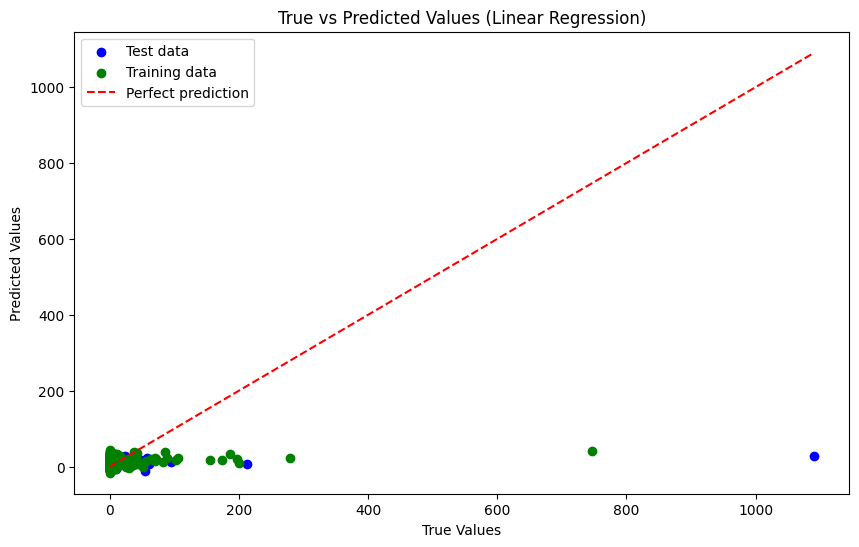

In [194]:
plt.figure(figsize=(10, 6))

# Scatter plot of true vs predicted values
plt.scatter(y_test, y_test_pred, color='blue', label='Test data')
plt.scatter(y_train, y_train_pred, color='green', label='Training data')
plt.plot([min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())], 
         [min(y_test.min(), y_train.min()), max(y_test.max(), y_train.max())], 
         color='red', linestyle='--', label='Perfect prediction')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Linear Regression)')
plt.legend()

plt.show()

### Logistic Regression

In [195]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [196]:
# Load data
forest_fires = fetch_ucirepo(id=162)  # Fetch forest fire dataset from UCI repository
features = forest_fires.data.features  # Extract features from the dataset
targets = forest_fires.data.targets  # Extract target variable from the dataset
df = pd.DataFrame(data=features, columns=forest_fires.feature_names)  # Create DataFrame for features
df['area'] = targets  # Add target variable 'area' to the DataFrame

# Data preprocessing
df = pd.get_dummies(df, columns=['day', 'month'], drop_first=True)  # One-hot encode categorical columns
df['rain'] = df['rain'].apply(lambda x: int(x > 0.0))  # Convert 'rain' column to binary variable
df = df[df['FFMC'].apply(lambda x: abs((x - df['FFMC'].mean()) / df['FFMC'].std()) < 3)]  # Remove outliers

# Define a threshold for 'area' to convert it into a binary classification problem
threshold = np.median(df['area'])  # Example: Use median as threshold
df['area_binary'] = (df['area'] > threshold).astype(int)

# Feature selection
X = df.drop(columns=['area', 'area_binary'])  # Features
y = df['area_binary']  # Target variable

selector = RFECV(LogisticRegression(max_iter=10000), cv=5)  # Initialize RFECV with Logistic Regression estimator
selector.fit(X, y)  # Fit RFECV on data
selected_features = X.columns[selector.support_]  # Get selected features

# Model building
X_selected = X[selected_features]  # Selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)  # Train-test split
model = LogisticRegression(max_iter=10000)  # Initialize Logistic Regression model
model.fit(X_train, y_train)  # Train the model on the training data

# Model evaluation
y_train_pred = model.predict(X_train)  # Predictions on training data
y_test_pred = model.predict(X_test)  # Predictions on test data

train_accuracy = accuracy_score(y_train, y_train_pred)  # Accuracy on training data
test_accuracy = accuracy_score(y_test, y_test_pred)  # Accuracy on test data

# Print evaluation metrics
print(f"Selected Features: {selected_features}")  # Print selected features
print(f"Test Accuracy: {test_accuracy}")  # Print test accuracy

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Selected Features: Index(['month_dec'], dtype='object')
Test Accuracy: 0.46078431372549017
Confusion Matrix:
[[ 0 55]
 [ 0 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.46      1.00      0.63        47

    accuracy                           0.46       102
   macro avg       0.23      0.50      0.32       102
weighted avg       0.21      0.46      0.29       102



c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diego Gerwig\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

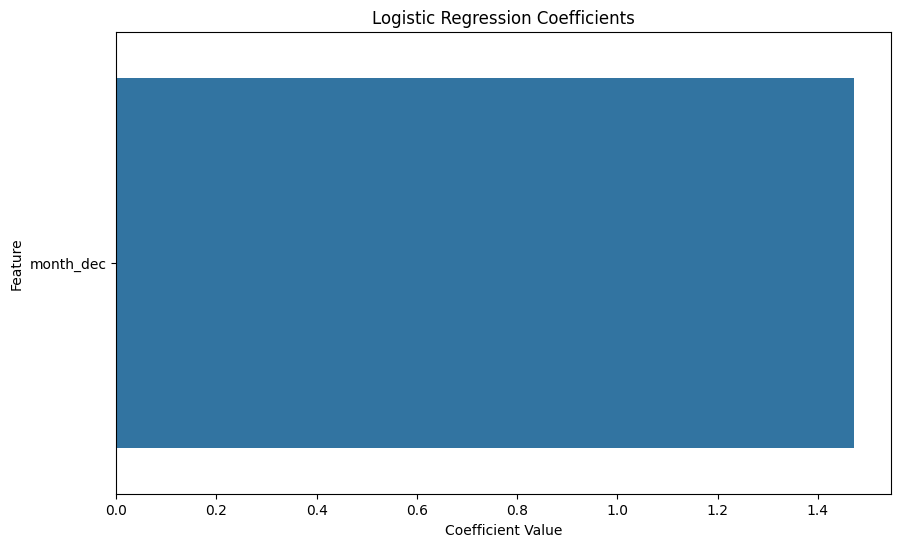

In [197]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model.coef_[0], y=X_selected.columns)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()